In [1]:
import pandas as pd
import xlrd

In [2]:
import xlrd

MCC_last = pd.read_excel('MCC_last.xlsx')
#MCC = pd.read_excel('MCC.xlsx')

In [38]:
MCC_full = MCC.append(MCC)

In [39]:
len(MCC_full)

1792

In [41]:
len(set(MCC_full['mcc'].values))

896

In [42]:
1792/896

2.0

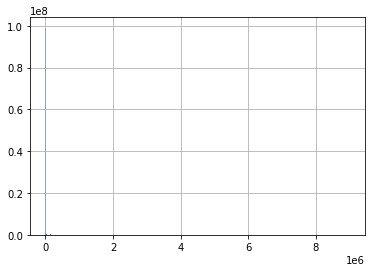

In [35]:
transactions

In [28]:
sum__ = transactions.amount.sum()

In [31]:
sum__/len(clients)/3

65215.693718310446

# MCC

In [4]:
MCC_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mcc       1792 non-null   int64 
 1   category  1792 non-null   object
dtypes: int64(1), object(1)
memory usage: 42.0+ KB


In [36]:
MCC_full

NameError: name 'MCC_full' is not defined

In [5]:
MCC.sample(5)

,mcc,category
781,6540,Money
544,3660,Tourism
247,3239,Tourism
125,3116,Tourism
290,3293,Tourism


In [6]:
MCC_last.sample(5)

,mcc,category
656,4761,Tourism
792,5994,Cultural life
860,7542,Auto
333,3384,Tourism
93,3082,Tourism


# Stores

In [3]:
stores = pd.read_csv('store_last_2.csv', sep=';', encoding='cp1251')

In [8]:
stores[stores['merchant_name']=='78UXJ8K.ZXXZH1.IXC K1J']

,store_name,merchant_name
8101,Google Adwords,78UXJ8K.ZXXZH1.IXC K1J


In [8]:
stores.sample(5)

,store_name,merchant_name
413337,Uber,L01J JL Y7DBV 4NBE1 A1
348017,Банкомат Райффайзенбанк 38750,J07 7EC QP6GV
55383,АЗС,72K VB-M6Q
411446,Uber,L01J WE JU22Q A1HW.L01
258606,М.Видео,C.T481X BVV


# clients 

In [4]:
clients_categories = pd.read_csv('client_categories.csv', delimiter=';')

In [5]:
clients_categories[clients_categories['category']==70]

,category,description
14,70,Regular retail banking customer


In [6]:
clients_categories.sample(5)

,category,description
13,61,RBA employees (family)
1,11,VIP/ Management recommendations (family)
23,96,Deal Participant
6,30,Corporate customer manager/ VIP
11,51,Corporate customer employee/ payroll scheme (f...


In [7]:
clients = pd.read_csv('clients_last_2_fixed.csv', delimiter=';')

In [12]:
clients[clients['cnum_']=='ELP4A2'] 

,cnum_,categorycode,gender,age,married_,residenttype
944628,ELP4A2,70,M,51,married,R


In [12]:
clients.sample(5)

,cnum_,categorycode,gender,age,married_,residenttype
714601,EL26HS,50,F,40,not_married,R
28628,2CDFXF,50,M,35,married,R
167980,E40GJV,50,M,23,not_married,R
799627,ELAV5B,50,F,31,married,R
903232,ELKYSZ,70,F,32,married,R


In [13]:
clients = clients.rename(columns={'cnum_': 'cnum'})

In [ ]:
clients

# Transactions

In [8]:
transactions = pd.read_csv('transactions_last_2.csv', delimiter=';')

In [12]:
clients['category'] = clients["categorycode"]
clients['cnum'] = clients["cnum_"]

clients = clients.drop(["categorycode",'cnum_'], axis = 1)

In [13]:
client_with_category = pd.merge(clients, clients_categories, on = 'category', how = 'left')

In [14]:
transactions_with_clients = pd.merge(transactions, client_with_category, on='cnum', how='left')

In [16]:
stores["mrchname"] = stores["merchant_name"] 
stores = stores.drop(["merchant_name"], axis = 1)

In [17]:
transactions_with_clients_and_merch = pd.merge(transactions_with_clients, stores, on='mrchname', how='left')

In [18]:
transactions_with_clients_and_merch.to_csv('transactions_with_clients_and_merch.csv', index = False)

In [26]:
transactions_with_clients_and_merch.sort_values('amount')

,purchdate,amount,mcc,mrchcity,mrchname,cnum,gender,age,married_,residenttype,category,description,store_name
104161407,2019-12-10 00:00:00,0.01,5812,MOSKVA,8-81H4T1JO,EL1IZ6,M,22,not_married,R,50,Corporate customer employee/ payroll scheme,NaN
104161281,2019-10-28 00:00:00,0.01,3690,SANKT-PETERBU,IXLJEO7J8 0O C7JJ4XE 9,EL7A5K,F,26,not_married,R,50,Corporate customer employee/ payroll scheme,NaN
104161280,2019-10-31 00:00:00,0.01,5814,MOSCOW,21H1D7O7 EXIA37,MRMRTN,F,45,not_married,R,81,Affluent Banking payroll customer,Зеленая Точка
104161279,2019-12-06 00:00:00,0.01,5411,OSINOVAYA GOR,ZHX0LK ELH7,8YHNSC,F,51,not_married,R,50,Corporate customer employee/ payroll scheme,Глобус Тула
104161278,2019-12-10 00:00:00,0.01,6012,MOSCOW,IBI J-XDH4D1,INGYON,F,28,not_married,R,50,Corporate customer employee/ payroll scheme,Райффайзенбанк C2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-03 00:00:00,5023956.60,5944,MOSKVA,73 7HJXK7 (W7X),MPKIJJ,M,54,married,R,17,Private Banking customers walk-in,NaN
3,2019-11-29 00:00:00,5100000.00,6513,SANKT-PETERBU,7X 1E7HXD H1DKW1IKCL,EL0KSF,F,46,married,R,70,Regular retail banking customer,NaN
2,2019-10-25 00:00:00,7716900.00,5691,MOSCOW,HXL4K TL4EEXD,ELETCO,F,51,married,R,80,Affluent Banking regular customer,Louis Vuitton
1,2019-11-02 00:00:00,9000000.00,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,F,59,married,R,17,Private Banking customers walk-in,Chanel


In [ ]:
transactions_with_clients_and_merch_sum = transactions_with_clients_and_merch[['store_name', 'amount']].groupby('amount').sum()

In [22]:
transactions_with_clients_and_merch[transactions_with_clients_and_merch.store_name['Яндекс Такси']]

KeyError: 'Яндекс Такси'

In [20]:
stores

,store_name,mrchname
0,Банкомат,VVVVVVVVVVVVSG/W7J4K 07ZL
1,Киви,VVVVVVVVVVVVR4U4 CXD1O
2,Банкомат,VVVVVVVVVVV/078 WXWLH7J K
3,Банкомат,VVVVVVVVVVV/08 7JJ4T7H AK
4,Банкомат,VVVVVVVVVVV1SV6
...,...,...
503280,Чайхона №1,ЧАЙХОНА №M
503281,Шоколадница,ШОКОЛАДНИЦА
503282,Госавтоинспекция,ШТРАФЫ ГИБДД
503283,Афиша.Яндекс,ЯНДЕКС.АФИША


In [25]:
E4SS6L_

,purchdate,amount,mcc,mrchcity,mrchname,cnum
60963585,2019-10-28 00:00:00,260.0,7278,money.mail.ru,OXLH7,E4SS6L
66948874,2019-12-01 00:00:00,210.0,7278,money.mail.ru,OXLH7,E4SS6L
75134041,2019-11-11 00:00:00,159.0,7311,MOSCOW,OXLH7,E4SS6L
100472491,2019-10-26 00:00:00,28.0,7278,money.mail.ru,OXLH7,E4SS6L
100472556,2019-11-02 00:00:00,28.0,7278,money.mail.ru,OXLH7,E4SS6L
...,...,...,...,...,...,...
104101152,2019-12-13 00:00:00,1.0,7278,money.mail.ru,OXLH7,E4SS6L
104101153,2019-12-11 00:00:00,1.0,7311,MOSCOW,OXLH7,E4SS6L
104101154,2019-12-13 00:00:00,1.0,7278,money.mail.ru,OXLH7,E4SS6L
104101155,2019-12-12 00:00:00,1.0,7311,MOSCOW,OXLH7,E4SS6L


In [24]:
E4SS6L_.groupby('mcc').count()

,purchdate,amount,mrchcity,mrchname,cnum
mcc,,,,,
7278,958,958,958,958,958
7311,514,514,514,514,514


In [20]:
E4SS6L_ = transactions[transactions['cnum']=='и']

In [15]:
transactions.head()

,purchdate,amount,mcc,mrchcity,mrchname,cnum
0,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
1,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
2,2019-10-25 00:00:00,7716900.0,5691,MOSCOW,HXL4K TL4EEXD,ELETCO
3,2019-11-29 00:00:00,5100000.0,6513,SANKT-PETERBU,7X 1E7HXD H1DKW1IKCL,EL0KSF
4,2019-12-03 00:00:00,5023956.6,5944,MOSKVA,73 7HJXK7 (W7X),MPKIJJ


In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104161408 entries, 0 to 104161407
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   purchdate  object 
 1   amount     float64
 2   mcc        int64  
 3   mrchcity   object 
 4   mrchname   object 
 5   cnum       object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ GB


# Skidki

In [45]:
skidki = pd.read_csv('skidki.csv', sep=';', encoding='cp1251')

In [46]:
skidki

,partner_name,offer_name,category,percents_,selltype,city_name,comment,enddate
0,Teana,Teanа,Парфюмерия и косметика,10.0,Online,NaN,Предложение действительно только в интернет-ма...,2021-10-01 03:00:00
1,Prime Travel,Prime Travel,Путешествия,5.0,Online,NaN,Кэшбэк – возврат средств.Сроки проведения акци...,2020-12-31 03:00:00
2,Special Travel Club,Special Travel Club,Путешествия,12.0,Online,NaN,NaN,2020-12-31 03:00:00
3,Hotels.com,Hotels.com,Путешествия,10.0,NaN,NaN,"Промокод действует только на отели, участвующи...",2020-12-31 03:00:00
4,Яндекс.Плюс,Яндекс.Плюс,Досуг и развлечения,NaN,Online,NaN,90 дней подписки Яндекс.Плюс. Активация по ссы...,2020-12-31 03:00:00
5,Rentalcars.com,Rentalcars.com,Аренда авто и транспорта,10.0,NaN,NaN,Скидка не предоставляется при бронировании авт...,2020-12-31 03:00:00
6,Комус,Комус,Интернет-магазины,6.0,Online,NaN,Кэшбэк выплачивается в течение 60 дней от даты...,2020-12-31 03:00:00
7,Gett,Gett,Услуги и сервисы,15.0,Online,NaN,Кэшбэк выплачивается только новым клиентам Get...,2020-12-31 03:00:00
8,ИЛЬ ДЕ БОТЭ,ИЛЬ ДЕ БОТЭ,Парфюмерия и косметика,25.0,Retail,NaN,"Список брендов, участвующих в акции, просьба у...",2020-12-31 03:00:00
9,ВкусВилл Готовит,ВкусВилл Готовит,Интернет-магазины,5.0,Online,NaN,Сроки проведения акции: 24.09.2020 – 24.11.202...,2020-11-24 03:00:00


# analysis

In [47]:
transactions_cliens = pd.read_csv('transactions_cliens.csv')

In [ ]:
transactions_cliens.groupby('mrchname').agg('sum')

In [19]:
#transactions_cliens = transactions.merge(clients, on='cnum')

In [20]:
transactions_cliens.to_csv('transactions_cliens.csv', index=None)

In [21]:
transactions_cliens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104161408 entries, 0 to 104161407
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   purchdate     object 
 1   amount        float64
 2   mcc           int64  
 3   mrchcity      object 
 4   mrchname      object 
 5   cnum          object 
 6   categorycode  int64  
 7   gender        object 
 8   age           int64  
 9   married_      object 
 10  residenttype  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 9.3+ GB


In [73]:
clients.groupby(["age", "cnum"]).size().reset_index(name='count')

,age,cnum,count
0,9,8EL7PR,1
1,15,8E46GJ,1
2,15,8EEJYH,1
3,15,E400QC,1
4,15,E4012P,1
...,...,...,...
1355920,89,EL02XE,1
1355921,89,ELBCIE,1
1355922,89,ELEOAY,1
1355923,89,LTLMTI,1


In [71]:
clients.groupby('age').count()[['cnum', 'gender']]

,cnum,gender
age,,
9,1,1
15,297,297
16,645,645
17,940,940
18,1130,1130
...,...,...
85,86,86
86,52,52
87,38,38


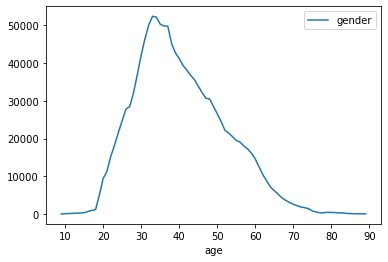

In [68]:
clients.groupby('age').count()[['cnum', 'gender']].plot()

In [30]:
import seaborn as sns

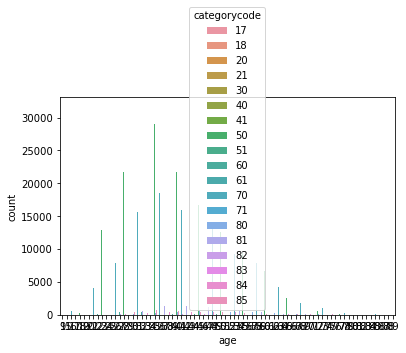

In [38]:
sns.countplot(x='age', data=clients, hue='categorycode')

In [ ]:
cli_1 = transactions_cliens.groupby(["cnum", "mrchname"]).size().reset_index(name='count')

In [1]:
cli_1

NameError: name 'cli_1' is not defined

In [17]:
cli_1.sort_values('count')

,cnum,mrchname,count
0,0CCCDO,1K7JY4-7OE4,1
22648592,ELIILR,7WE137 J78LZ7,1
22648589,ELIILR,4W KAT1IXT J.K.,1
22648587,ELIILR,3H4D437 3J7KXEO,1
22648586,ELIILR,0L3TX18,1
...,...,...,...
24655263,ELORP8,KEXHXEX M,954
11976123,E4X2PE,OXLH7,1317
13871498,EE85DF,CCJ C7C07,1375
10662289,E4SS6L,OXLH7,1455


In [2]:
import pandas as pd
cli_1 = pd.read_csv('clients_stores.csv')

In [83]:
cli[cli['count']==2175]

,cnum,mrchname,count
24746056,ELP4A2,78UXJ8K.ZXXZH1.IXC K1J,2175


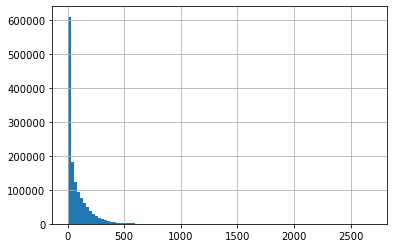

In [50]:
names.hist(bins=100)

In [56]:
len(set(names.index))

1355925

In [58]:
names_names = names.index

In [59]:
names_count = names.values

In [64]:
names_count.max()

2690

503285

In [43]:
names

NameError: name 'names' is not defined